
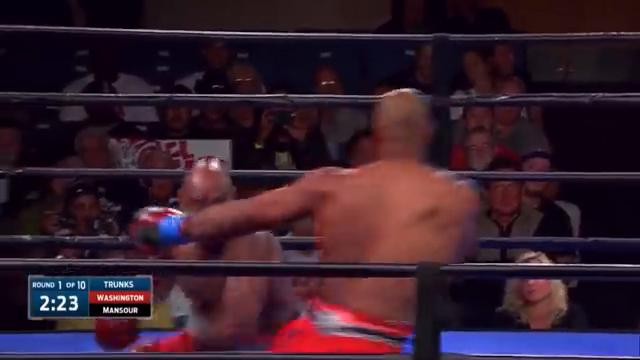

2nd referee in a boxing match, observing the action in the ring.


In [ ]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "/home/ubuntu/vlm-experiments/box_videos/ropeYt/frame_0037.png"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

from langchain_ollama import OllamaLLM

llm = OllamaLLM(model="bakllava")

llm_with_image_context = llm.bind(images=[image_b64])
res = llm_with_image_context.invoke('''You are given an image of two fighters in a boxing ring. Analyze it and output **only** this JSON:
                                        {
                                        "against_ropes": "YES" or "NO",
                                        "shorts_of_the_fighter_against_ropes": null or "<color>"
                                        }
                                        Rules:
                                        1. Set `"against_ropes": "YES"` **only** if you are **clearly** certain that a fighter’s body (torso or legs) is pressed against the ropes or trapped in a corner.
                                        2. If you say YES, set `"shorts_of_the_fighter_against_ropes"` to the dominant color of that fighter’s shorts (e.g. "red", "blue").
                                        3. If you are **not** at least 80% confident, or cannot see evidence of contact, set `"against_ropes": "NO"` and `"shorts_of_the_fighter_against_ropes": null`.
                                        4. **Do not** add any other keys or text—return exactly the JSON above.
                                    ''')

print(res)

In [4]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("Larxel/healthqa-br")


/home/ubuntu/.local/share/virtualenvs/ice_breaker-cdeTGeOn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 5632/5632 [00:00<00:00, 216183.03 examples/s]


In [1]:
!pip list

Package                  Version
------------------------ ---------------
aiohappyeyeballs         2.6.1
aiohttp                  3.12.14
aiosignal                1.4.0
annotated-types          0.7.0
anyio                    4.9.0
asttokens                3.0.0
async-timeout            4.0.3
attrs                    25.3.0
black                    25.1.0
certifi                  2025.7.14
charset-normalizer       3.4.2
click                    8.2.1
comm                     0.2.3
dataclasses-json         0.6.7
datasets                 4.0.0
debugpy                  1.8.15
decorator                5.2.1
dill                     0.3.8
distro                   1.9.0
exceptiongroup           1.3.0
executing                2.2.0
filelock                 3.18.0
frozenlist               1.7.0
fsspec                   2025.3.0
greenlet                 3.2.3
h11                      0.16.0
hf-xet                   1.1.5
httpcore                 1.0.9
httpx                    0.28.1
httpx-sse   

In [ ]:
!pip install fastparquet pyarrow huggingface_hub pandas



  Using cached huggingface_hub-0.34.3-py3-none-any.whl.metadata (14 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached hf_xet-1.1.5-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (879 bytes)
  Using cached charset_normalizer-3.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.7.14-py3-none-any.whl.metadata (2.4 kB)
Using cached huggingface_hub-0.34.3-py3-none-any.whl (558 kB)
Using cached hf_xet-1.1.5-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.man

In [ ]:
from huggingface_hub import hf_hub_download
import pyarrow.parquet as pq
import pandas as pd

# Baixar o arquivo localmente
file_path = hf_hub_download(
    repo_id="Larxel/healthqa-br",
    filename="healthqa-br.parquet",
    repo_type="dataset"
)

# Ler com pyarrow ignorando extensões não registradas
table = pq.read_table(file_path)  # ou use: ignore_metadata=True
df = table.to_pandas()

df = df.dropna()
print(df.head())


In [36]:
df

,id,source,year,group,question,answer
0,7f537911,Revalida,2013,None,"Homem com 49 anos de idade apresenta, há um an...",C
1,aa6d6553,Revalida,2013,None,Mulher com 72 anos de idade vem fazendo tratam...,A
2,e60829a6,Revalida,2013,None,Homem com 26 anos de idade procura atendimento...,E
3,b1a8e172,Revalida,2013,None,Menina com 12 anos de idade tem diagnóstico de...,E
4,2a5533b0,Revalida,2013,None,"Mulher com 19 anos de idade, primigesta, com g...",B
...,...,...,...,...,...,...
5627,b362e2a1,Enare Residência Médica,2024,Cirurgia Geral,Um paciente de 59 anos apresenta fadiga progre...,C
5628,31d3a5ef,Enare Residência Médica,2024,Cirurgia Geral,Uma mulher de 39 anos chega ao ambulatório com...,D
5629,f54fdcab,Enare Residência Médica,2024,Cirurgia Geral,Um homem de 60 anos apresenta-se ao consultóri...,B
5630,a6714d31,Enare Residência Médica,2024,Clínica Médica,Uma estudante universitária de 23 anos marcou ...,E


In [37]:
pergunta = df['question'][df['id'] == '41f73e04'].values[0]
pergunta_1 = df['question'][df['id'] == '31d3a5ef'].values[0]

ans = df['answer'][df['id'] == '41f73e04'].values[0]
ans_1 = df['answer'][df['id'] == '31d3a5ef'].values[0]

In [45]:
# Example Python code to load MedGemma model
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/medgemma-4b-it")
model = AutoModelForCausalLM.from_pretrained("google/medgemma-4b-it")

Loading checkpoint shards: 100%|██████████| 2/2 [00:06<00:00,  3.02s/it]


In [ ]:
# Tokenize o input
inputs = tokenizer(pergunta, return_tensors="pt")

# Gere a resposta
outputs = model.generate(**inputs, max_new_tokens=100)

# Decodifique a resposta
resposta = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(resposta)

A respeito da 8ª Conferência Nacional de Saúde, realizada em Brasília, no ano de 1986, assinale a afirmativa correta.

'A': 'Estabeleceu um marco histórico, mas ainda sem participação popular.'
'B': 'Propôs a criação de um sistema de saúde público e de um privado, independentes.'
'C': 'Criou o arcabouço do SUS e a Comissão Nacional da Reforma Sanitária (CNRS).'
'D': 'Teve como tema central efetivando o SUS – acesso, qualidade e humanização na atenção à saúde com controle social.'
'E': 'Criou o Sistema Nacional de Vigilância Epidemiológica.'A fim de analisar a atuação de uma das lideranças feministas no Brasil, foram trazidas ao leitor as seguintes informações:

1. Ativista do sindicalismo.

2. Inclusa nas discussões da Revolução de 1930.

3. Participou das lutas contra as ditaduras do período Vargas e Medeiros.


In [ ]:
# Tokenize o input
prompt = "me de a reposta correta entre A B C D E "
inputs = tokenizer(prompt+pergunta, return_tensors="pt")

# Gere a resposta
outputs = model.generate(**inputs, max_new_tokens=75)

# Decodifique a resposta
resposta = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(resposta)

me de a reposta correta entre A B C D E A respeito da 8ª Conferência Nacional de Saúde, realizada em Brasília, no ano de 1986, assinale a afirmativa correta.

'A': 'Estabeleceu um marco histórico, mas ainda sem participação popular.'
'B': 'Propôs a criação de um sistema de saúde público e de um privado, independentes.'
'C': 'Criou o arcabouço do SUS e a Comissão Nacional da Reforma Sanitária (CNRS).'
'D': 'Teve como tema central efetivando o SUS – acesso, qualidade e humanização na atenção à saúde com controle social.'
'E': 'Criou o Sistema Nacional de Vigilância Epidemiológica.'

Saindo do livro.

Um dos problemas que mais nos afetam no Brasil atualmente é a malnutrição infantil, fato que pode ser resultado de uma pobreza extrema. No contexto que apresento, a ação educativa mais adequada para esse público seria:

a) Orientar sobre a importância da água potável e a higienização na prevenção de doenças.



In [29]:
# Tokenize o input
prompt = "de forma reduzida, a reposta correta entre as alternativas "
inputs = tokenizer(prompt+pergunta, return_tensors="pt")

# Gere a resposta
outputs = model.generate(**inputs)

# Decodifique a resposta
resposta = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(resposta)

de forma reduzida, a reposta correta entre as alternativas A respeito da 8ª Conferência Nacional de Saúde, realizada em Brasília, no ano de 1986, assinale a afirmativa correta.

'A': 'Estabeleceu um marco histórico, mas ainda sem participação popular.'
'B': 'Propôs a criação de um sistema de saúde público e de um privado, independentes.'
'C': 'Criou o arcabouço do SUS e a Comissão Nacional da Reforma Sanitária (CNRS).'
'D': 'Teve como tema central efetivando o SUS – acesso, qualidade e humanização na atenção à saúde com controle social.'
'E': 'Criou o Sistema Nacional de Vigilância Epidemiológica.'

a) Somente a afirmativa 'E' está correta.
b) Som


In [46]:
ans

'C'

In [47]:
# Tokenize o input
prompt = """Você é um especialista em responder questões de múltipla escolha. Dada a pergunta e suas alternativas, responda com apenas a alternativa correta no seguinte formato JSON:

                    {
                    "answer": "X"
                    }

            Substitua X por A, B, C, D ou E. Não repita a pergunta nem as alternativas. Não adicione nenhuma explicação. Apenas retorne o JSON com a letra correta.
        """
inputs = tokenizer(prompt+pergunta_1, return_tensors="pt")

# Gere a resposta
outputs = model.generate(**inputs)

# Decodifique a resposta
resposta = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(resposta, ans_1)

Você é um especialista em responder questões de múltipla escolha. Dada a pergunta e suas alternativas, responda com apenas a alternativa correta no seguinte formato JSON:

                    {
                    "answer": "X"
                    }

            Substitua X por A, B, C, D ou E. Não repita a pergunta nem as alternativas. Não adicione nenhuma explicação. Apenas retorne o JSON com a letra correta.
        Uma mulher de 39 anos chega ao ambulatório com queixa de
dificuldade para engolir, inicialmente apenas para sólidos, mas
agora também para líquidos, que vem se agravando
progressivamente nos últimos 8 meses. Ela também relata perda
de peso significativa de mais de 10 kg e episódios de regurgitação
de alimentos não digeridos. Não há histórico de doenças crônicas
ou cirurgia prévia. No exame físico, o estado geral é bom, mas
com perda ponderal evidente. A endoscopia digestiva alta revela
retenção de alimentos no esôfago, sem evidências de estenose
ou massa. A manometria es

In [42]:
!pip install langchain langchain-community langchainhub openai
!pip install langchain-ollama


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached langchain-0.3.27-py3-none-any.whl.metadata (7.8 kB)
  Using cached langchain_community-0.3.27-py3-none-any.whl.metadata (2.9 kB)
  Using cached langchainhub-0.1.21-py3-none-any.whl.metadata (659 bytes)
  Using cached openai-1.97.1-py3-none-any.whl.metadata (29 kB)
  Using cached langchain_core-0.3.72-py3-none-any.whl.metadata (5.8 kB)
  Using cached langchain_text_splitters-0.3.9-py3-none-any.whl.metadata (1.9 kB)
  Using cached langsmith-0.4.8-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached async_timeout-4.0.3-py3-none-any.whl.metadata (4.2 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.33.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached langchain_ollama-0.3.6-py3-none-any.whl.metadata (2.1 kB)
  Using cached ollama-0.5.1-py3-none-any.whl.metadata (4.3 kB)
Using cached ollama-0.5.1-py3-none-any.whl (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [langchain-ollama]


In [44]:
!ollama run alibayram/medgemma:4b

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠦ pulling manifest 
pulling 2d20114e538b:   0% ▕                  ▏ 7.7 MB/2.5 GB                  pulling manifest 
pulling 2d20114e538b:   2% ▕                  ▏  39 MB/2.5 GB                  pulling manifest 
pulling 2d20114e538b:   2% ▕                  ▏  53 MB/2.5 GB                  pulling manifest 
pulling 2d20114e538b:   3% ▕                  ▏  82 MB/2.5 GB                  pulling manifest 
pulling 2d20114e538b:   4% ▕                  ▏ 110 MB/2.5 GB                  pulling manifest 
pulling 2d20114e538b:   5% ▕                  ▏ 125 MB/2.5 GB                  pulling manifest 
pulling 2d20114e538b:   6% ▕█                 ▏ 154 MB/2.5 GB                  pulling manifest 
pulling 2d20114e538b:   7% ▕█                 ▏ 182 MB/2.5 GB                  pulling manifest 
pulling 2d20114e538b:   8% ▕█                 ▏ 197 MB/2.5 GB                  pulling manif

In [ ]:
from langchain_community.llms import Ollama
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain

# Inicializa o modelo Gemma rodando no Ollama
llm = Ollama(model="alibayram/medgemma:4b")

# Define o prompt
prompt = PromptTemplate(
    input_variables=["question"],
    template=(
        """Você é um especialista em responder questões de múltipla escolha. Dada a pergunta e suas alternativas, responda com apenas a alternativa correta no seguinte formato JSON:

                    {{
                    "answer": "X"
                    }}

            Substitua X por A, B, C, D ou E. Não repita a pergunta nem as alternativas. Não adicione nenhuma explicação. Apenas retorne o JSON com a letra correta.
        
        Pergunta:\n{question}"""
    )
)

# Cria a cadeia com LLM
chain = LLMChain(llm=llm, prompt=prompt)

# Pergunta de exemplo

response = chain.run(question=pergunta)
print(response)


```json
{
  "answer": "C"
}
```


In [ ]:
# Supondo que sua coluna de perguntas se chama 'question'
def responder_pergunta(pergunta):
    return chain.run(question=pergunta)

# Crie uma nova coluna com as respostas
df['resposta_llm'] = df['question'].apply(responder_pergunta) #Dividir em batches de 1000

# Visualize as primeiras respostas
print(df[['question', 'resposta_llm']].head())

KeyboardInterrupt: 

In [59]:
df_sample = df.sample(5)  # 5 perguntas aleatórias
df_sample['resposta_llm'] = df_sample['question'].apply(responder_pergunta)
print(df_sample[['question', 'resposta_llm', 'answer']])

                                               question  \
279   Ao receber resultados de citologia realizada p...   
963   Um homem com 22 anos de idade, previamente sau...   
4335  Um paciente de 58 anos se apresenta na emergên...   
3555  Mulher de 42 anos, sem histórico de patologias...   
915   Uma mulher com 32 anos de idade, solteira, sem...   

                             resposta_llm answer  
279   ```json\n{\n  "answer": "B"\n}\n```      C  
963   ```json\n{\n  "answer": "B"\n}\n```      A  
4335  ```json\n{\n  "answer": "E"\n}\n```      E  
3555  ```json\n{\n  "answer": "E"\n}\n```      B  
915   ```json\n{\n  "answer": "B"\n}\n```      B  


In [60]:
!pwd

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/home/ubuntu/langChain/ice_breaker
